# Visualisation

In [66]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# Global plot style settings
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["DejaVu Serif"],
    "mathtext.fontset": "cm",            # Use Computer Modern for math
    "font.size": 14,                     # Base font size
    "axes.labelsize": 16,                # Axis label font size
    "axes.titlesize": 16,                # Title font size
    "legend.fontsize": 13,               # Legend font size
    "xtick.labelsize": 13,               # X tick label size
    "ytick.labelsize": 13,               # Y tick label size
    "axes.linewidth": 1.2,               # Thicker axis lines
    "xtick.direction": "in",             # x-yick direction
    "ytick.direction": "in",             # y-tick direction
    #"xtick.top": True,                   # Ticks on top
    #"ytick.right": True,                 # Ticks on right
    "text.usetex": False,                # Enable LaTeX if needed
    "figure.dpi": 150,                   # Good resolution for screens
    "savefig.dpi": 300                   # High resolution for saving
})

In [67]:
# Define function for nice plotting
def PlotSettings(ax, gridlines=False, minimalist=False):

    # Minimalist style
    if minimalist:
        # Hide top and right spines (borders)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        # Ticks only on bottom and left
        ax.tick_params(which='both', top=False, right=False)
    else:
        # Minor ticks
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())
        # Tick parameters
        ax.tick_params(which='both', direction='in', top=True, right=True)
        ax.tick_params(which='major', length=7, width=1.2)
        ax.tick_params(which='minor', length=4, width=1)
    # Optional grid
    if gridlines:
        ax.grid(True, which="major", linestyle="--", linewidth=0.6, alpha=0.7)
        ax.grid(True, which="minor", linestyle=":", linewidth=0.5, alpha=0.4)


In [68]:
def model(t, a, b):
    return np.cos(a*t) * np.exp(-b*t)
# Generate synthetic data
rng = np.random.default_rng(42)

xsamples = np.linspace(0, 3, 17)
y1 = model(xsamples, 10, 1) + rng.normal(scale=.1, size=xsamples.shape)
y2 = model(xsamples, 20, 1.4) + rng.normal(scale=.1, size=xsamples.shape)
x = np.linspace(0, 3, 500)

y1_err = 0.05 + 0.05 * np.random.rand(len(y1))
y2_err = 0.05 + 0.05 * np.random.rand(len(y2))

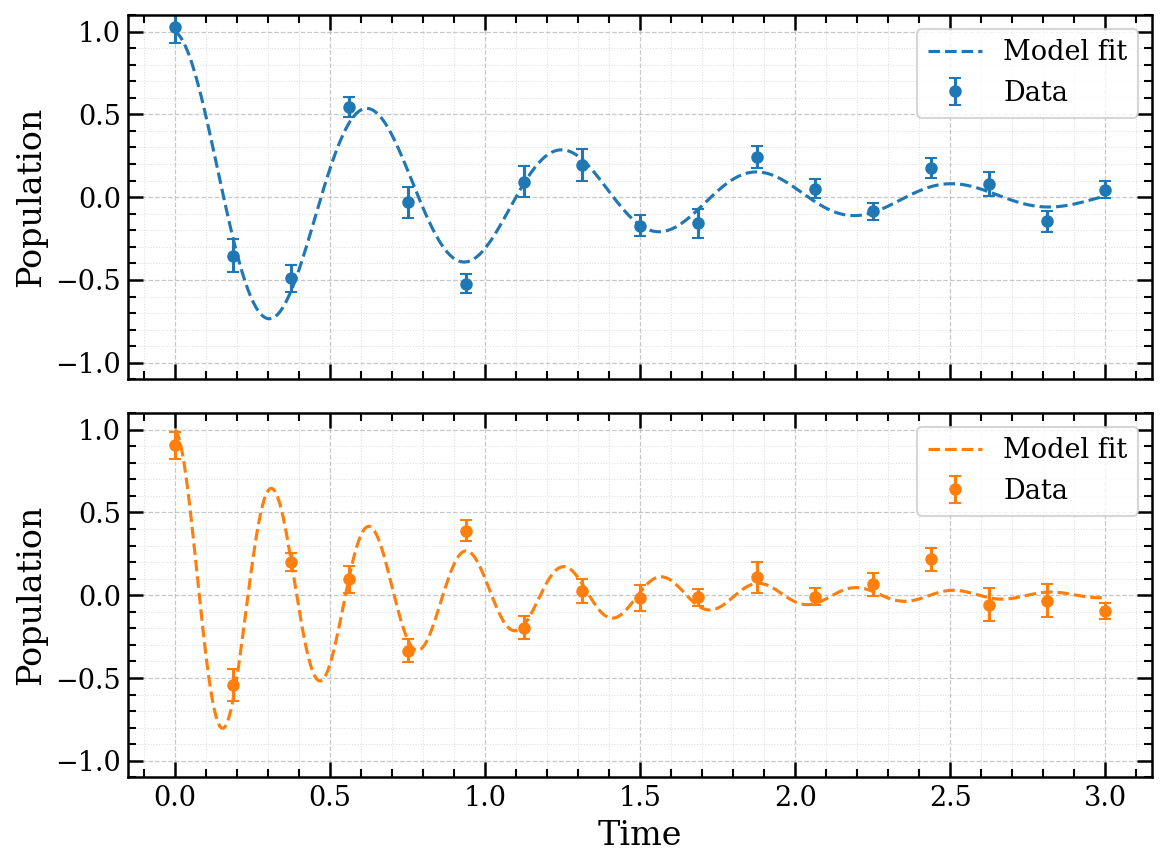

In [69]:
# Create the plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True, sharey=True)

# Subplot 1
#ax1.scatter(xsamples, y1, label='Sampled Data 1', color='C0')
ax1.errorbar(xsamples, y1, yerr=y1_err, fmt='o', color='C0',
             capsize=3, markersize=5, label='Data')
ax1.plot(x, model(x, 10, 1), color='C0', linestyle='--', label='Model fit')
ax1.set_ylabel('Population')
#ax1.set_xlim(0, 3)
ax1.set_ylim(-1.1, 1.1)
ax1.legend(loc='upper right')
PlotSettings(ax1, gridlines=True)

# Subplot 2
#ax2.scatter(xsamples, y2, label='Sampled Data 2', color='C1')
ax2.errorbar(xsamples, y2, yerr=y2_err, fmt='o', color='C1',
             capsize=3, markersize=5, label='Data')
ax2.plot(x, model(x, 20, 1.4), label='Model fit', color='C1', linestyle='--')
ax2.set_xlabel('Time')
ax2.set_ylabel('Population')
ax2.legend(loc='upper right')
PlotSettings(ax2, gridlines=True)

# Adjust layout
plt.tight_layout()
# Save the figure
plt.savefig('model_fit_example.png', bbox_inches='tight')
# Show the plot
plt.show()

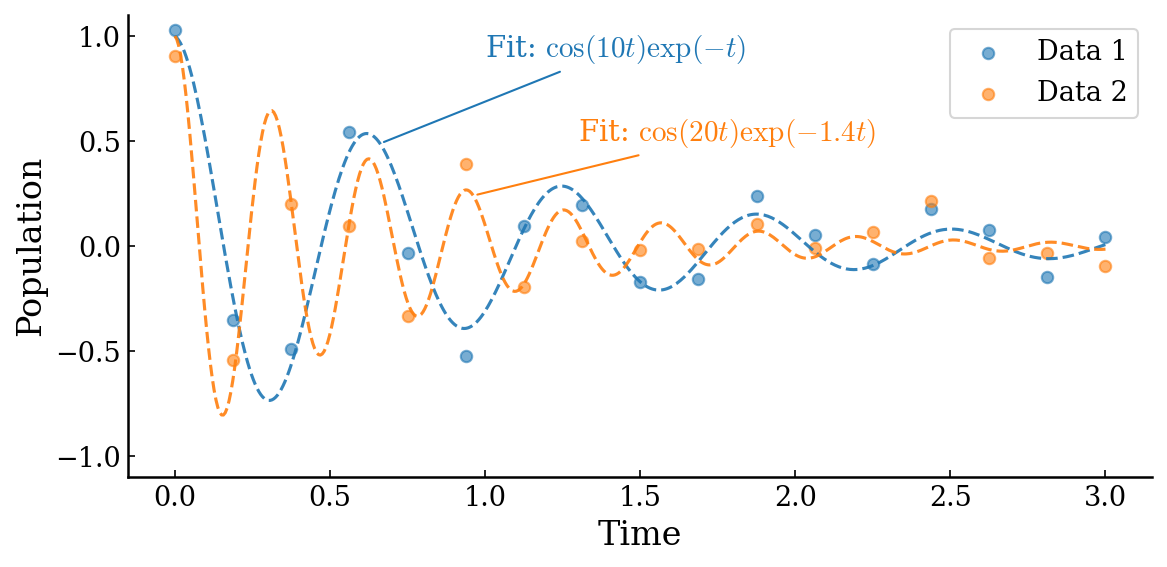

In [77]:
# Create the plot
fig, ax = plt.subplots(figsize=(8, 4))

indx = 110

ax.scatter(xsamples, y1, label='Data 1', color='C0', alpha=0.6, s=30)
ax.plot(x, model(x, 10, 1), color='C0', linestyle='--', alpha=0.9)
ax.annotate(r'Fit: $\cos(10t)\exp(-t)$', xy=(x[indx], model(x, 10, 1)[indx]),
            xycoords='data', xytext=(1, 0.9), color='C0',
            arrowprops=dict(arrowstyle='-', color='C0', lw=1))

ax.scatter(xsamples, y2, label='Data 2', color='C1', alpha=0.6, s=30)
ax.plot(x, model(x, 20, 1.4), color='C1', linestyle='--', alpha=0.9)
ax.annotate(r'Fit: $\cos(20t)\exp(-1.4t)$', xy=(x[indx+50], model(x, 20, 1.4)[indx+50]),
            xycoords='data', xytext=(1.3, 0.5), color='C1',
            arrowprops=dict(arrowstyle='-', color='C1', lw=1))

ax.set_xlabel('Time')
ax.set_ylabel('Population')
#ax1.set_xlim(0, 3)
ax.set_ylim(-1.1, 1.1)
ax.legend(loc='upper right')
PlotSettings(ax, minimalist=True)
# Adjust layout
plt.tight_layout()
# Save the figure
plt.savefig('model_fit_combined.png', bbox_inches='tight')
# Show the plot
plt.show()

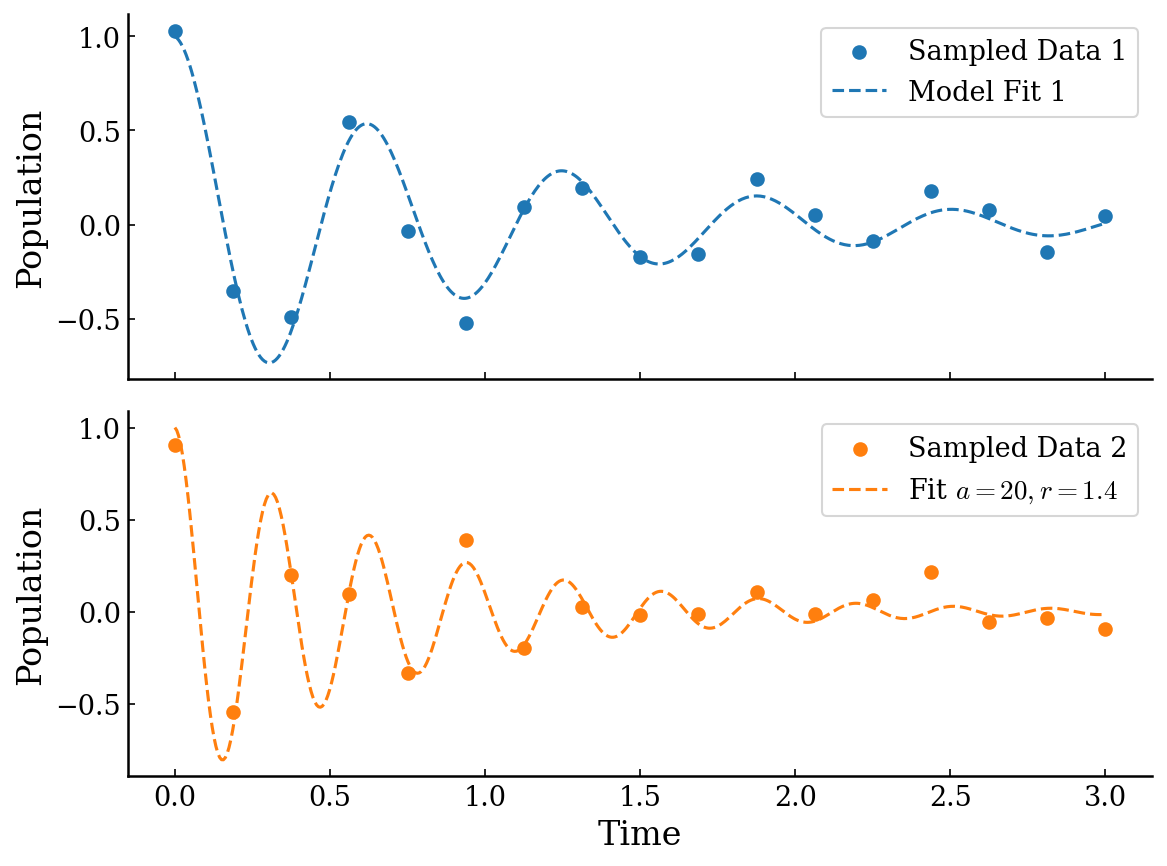

In [71]:
# Create the plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Subplot 1
ax1.scatter(xsamples, y1, label='Sampled Data 1', color='C0')
ax1.plot(x, model(x, 10, 1), label='Model Fit 1', color='C0', linestyle='--')
ax1.set_ylabel('Population')
ax1.legend(loc='upper right')
PlotSettings(ax1, minimalist=True)
#ax1.tick_params(labelbottom=False)
#ax1.get_xaxis().set_visible(False)

# Subplot 2
ax2.scatter(xsamples, y2, label='Sampled Data 2', color='C1')
ax2.plot(x, model(x, 20, 1.4), label='Fit $a=20, r=1.4$', color='C1', linestyle='--')
ax2.set_xlabel('Time')
ax2.set_ylabel('Population')
ax2.legend(loc='upper right')
PlotSettings(ax2, minimalist=True)

# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()